<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Dayana Navarro Valencia y Juan Pablo Ruiz Magaña

**Fecha:** 8 de marzo del 2021

**Expediente** : if721470
**Profesor:** Oscar David Jaramillo Zuluaga.

## Link de Github:

# Tarea 6: Clase 10_MetodoAceptacionRechazo

## Enunciado de tarea
> Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
![imagen.png](attachment:imagen.png)

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
![imagen.png](attachment:imagen.png)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

### SOLUCION JUAN PABLO

In [32]:
# Código de solución 
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd

### Inciso 1

In [2]:
#función f_x
f_x = lambda x: 30*(x**2-2*x**3+x**4)

In [3]:
#obteniendo el maximo de la funcion f_x
a = f_x(optimize.fmin(lambda x:-f_x(x), 0, disp=False))
a

array([1.875])

In [4]:
# definiendo t_x
t_x = lambda x: a*np.sin(np.pi*x)

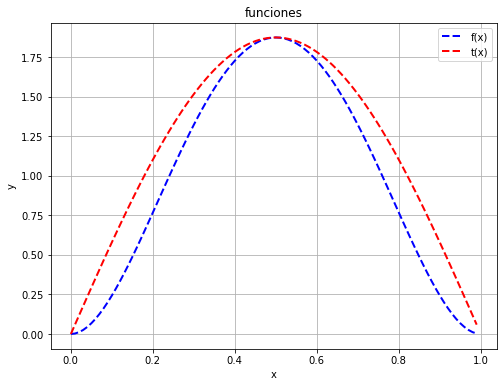

In [5]:
# grafica para comprobar que la condición t(x) >= f(x) se cumple
x = np.arange(0,1,0.01)
plt.figure(figsize=[8,6])
plt.title('funciones')
plt.ylabel('y')
plt.xlabel('x')
plt.plot(x,f_x(x),'--b',lw=2,label='f(x)')
plt.plot(x,t_x(x),'--r',lw=2,label='t(x)')
plt.grid()
plt.legend()

### Inciso 2. Encontrar g(x)

#### Recordando lo visto en clase
$ t(x) = a\sin(\pi x)$


$ c = \int_{-\infty}^{\infty} t(x) dx$


$ g(x) = \frac{t(x)}{c}$

#### Integrando ${t(x)}$ dentro del dominio de la función [0,1] , c es igual a:


$ c = \int_{0}^{1} a\sin(\pi x) dx$

#### Al realizar la integral se evaluan los limites:
 
$ c = \frac{-a\cos(\pi)}{\pi} - \frac{-a\cos(0)}{\pi} $

$ c = \frac{2a}{\pi} $

#### Por lo tanto g(x) es igua a:

$ g(x) = \frac{a\sin(\pi x)}{\frac{2a}{\pi}}$

#### Simplificando:

$ g(x) = \frac{\pi\sin(\pi x)}{2} $

### Obteniendo G(x):
 $\int_{0}^{x} g(x) dx$

#### Al realizar la integral se evaluan los limites:

$ G(x) = \frac{-\cos(\pi x)}{2} - \frac{-\cos(0)}{2} $


$ G(x) =  \frac{-\cos(\pi x)}{2} + \frac{1}{2} $


$ G(x) = \frac{1}{2}(-\cos(\pi x)+1) $

$ G(x) = -\frac{1}{2}(\cos(\pi x)-1) $

### Inciso 3. Aplicar método de la transformada inversa

#### Obteniendo la inversa:
$ G(x) = U $

$ -\frac{1}{2}(\cos(\pi x)-1) = U $

$ \cos(\pi x)-1 = -2U $

$ \cos(\pi x) = -2U + 1 $

$ \pi x = \cos^{-1}(-2u+1) $

$ x = \frac{\cos^{-1}(-2u+1)}{\pi} $

In [6]:
# programando la función

G_x = lambda x: (np.arccos(-2*x+1))/np.pi

### Se busca comprobar por medio de la derivada:

##### La derivada de G(x) es g(x):

$ \frac{dG(x)}{dx} = \frac{\pi\sin(\pi x)}{2} $

In [9]:
g_x = lambda x: (np.pi*np.sin(np.pi*x))/2

In [7]:
N = 10000
U = np.random.rand(N)
u_I = list(map(lambda u: G_x(u),U))

In [10]:
x2 = np.arange(0,1,0.01)
y2 = g_x(x2)

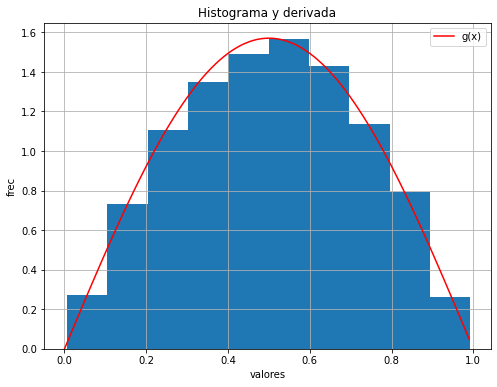

In [12]:
plt.figure(figsize=[8,6])
plt.title('Histograma y derivada')
plt.xlabel('valores')
plt.ylabel('frec')
plt.hist(u_I,density=True)
plt.plot(x2,y2,'-r',label='g(x)')
plt.legend()
plt.grid()

### Inciso 5

In [14]:
# Función de aceptación y rechazo
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):

    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
        for i in range(len(R1))]
                
    plt.show()
    #x = [R1[i] for i in range(len(R1)) if condition[i]]
    #return x

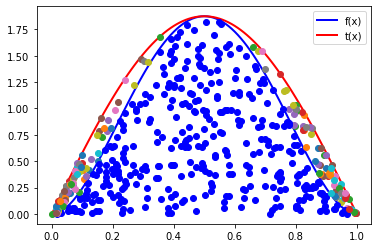

In [15]:
N = 500
R2 =np.random.rand(N) 
R1 =np.random.uniform(0,1,size=N)

plt.plot(x,f_x(x),'-b',lw=2,label='f(x)')
plt.plot(x,t_x(x),'-r',lw=2,label='t(x)')
plt.legend()
Acep_rechazo(R2,R1,f_x,t_x)

### Inciso 6. 
Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

Calculo el porcentaje de puntos aceptados previamente.

In [17]:
# Función de aceptación y rechazo
def Acep_rechazo2(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):

    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    #[plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
    #    for i in range(len(R1))]
                
    #plt.show()
    x = [R1[i] for i in range(len(R1)) if condition[i]]
    return x

In [18]:
senoi = Acep_rechazo2(R2,R1,f_x,t_x)
pct=len(senoi)/N
print('El porcentaje de puntos aceptado cuando t(x) es un pulso senoideal es:',pct)

El porcentaje de puntos aceptado cuando t(x) es un pulso senoideal es: 0.714


Recordando del máximo de f(x) fue a defino mi nueva función t(x) = a.

In [19]:
t_x2 = lambda x: a*np.ones(len(x))
cte = Acep_rechazo2(R2,R1,f_x,t_x2)
pct2 = len(cte)/N
print('El porcentaje de puntos aceptado cuando t(x) es una constante es:',pct2)

El porcentaje de puntos aceptado cuando t(x) es una constante es: 0.548


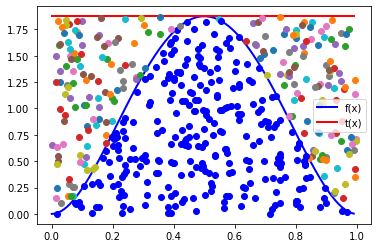

In [20]:
plt.plot(x,f_x(x),'-b',lw=2,label='f(x)')
plt.plot(x,t_x2(x),'-r',lw=2,label='t(x)')
plt.legend()
Acep_rechazo(R2,R1,f_x,t_x2)

### Conclusión:
Se puede observar que se cumple lo que teoricamente se menciono en clase, es decir, con una función constante se aceptan menos puntos que con una función que se aproxime más a la función dada.

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

In [21]:
f = lambda x: 20*x*(1-x)**3

### Propongo un caso particular y defino mi t(x) = Cte

> Esta constante será igual al máximo de la función f(x)

In [22]:
c = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
c

array([2.109375])

In [23]:
t = lambda x: c*np.ones(len(x))

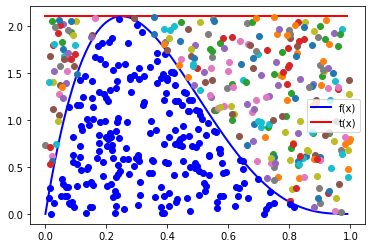

In [24]:
plt.plot(x,f(x),'-b',lw=2,label='f(x)')
plt.plot(x,t(x),'-r',lw=2,label='t(x)')
plt.legend()
Acep_rechazo(R2,R1,f,t)

In [28]:
# generando una variable alearotia
vas = Acep_rechazo2(R2,R1,f,t)
vas

[0.22105968679968524,
 0.4800147593972073,
 0.36268326873193946,
 0.43256570272552475,
 0.39480311578264193,
 0.4243310145361139,
 0.3420642672823513,
 0.321630839899533,
 0.49457736760174076,
 0.1361477082273227,
 0.2571461465299745,
 0.4569269614717715,
 0.10472359579786783,
 0.49406677223510553,
 0.42354168272755244,
 0.44625139328570795,
 0.5641828600850627,
 0.21480410741739475,
 0.5740461581831134,
 0.18794829982184358,
 0.5807079910800036,
 0.4036282810238455,
 0.531785785387546,
 0.3895670694923018,
 0.06940719955510533,
 0.3046931932860506,
 0.46599215693348683,
 0.5205343177817875,
 0.8153670897319796,
 0.2712814493875022,
 0.3049569529063759,
 0.40362087202947305,
 0.13318991415689652,
 0.5057209145066419,
 0.38808507101642375,
 0.3190204238624115,
 0.503192570808824,
 0.2620330895604879,
 0.7157309302778506,
 0.07736753745914404,
 0.7497201429510686,
 0.42644021538210897,
 0.38002851263774473,
 0.5579865303723697,
 0.5037744993859589,
 0.4612890325533454,
 0.206845795761799

> ## <font color ='red'>Tarea
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

$ P(K+1) = \frac{e^{-\lambda} \lambda^{k+1}}{k+1!}$


$\frac{P(K+1)}{P(K)} = \frac{\frac{e^{-\lambda} \lambda^{k+1}}{k+1!}}{\frac{e^{-\lambda} \lambda^{k}}{k!}}$


$\frac{P(K+1)}{P(K)} = \frac{\frac{e^{-\lambda} \lambda^{k+1}}{k+1 k!}}{\frac{e^{-\lambda} \lambda^{k}}{k!}}$


$\frac{P(K+1)}{P(K)} = \frac{\lambda}{k+1}$

$ P(K+1) = \frac{\lambda}{k+1} P(K)$

In [29]:
# función para calcular la probabilidad acumulada

lamb=1
k = 10
def poisson(k,lamb):
    v = np.zeros(k)
    v[0] = lamb/(k+1)
    def llenado(i):
        nonlocal v
        p_k = (np.exp(-lamb)*lamb**k)/k*k
        
        
        v[i+1]=(lamb/v[i]) * p_k
        
    
    [llenado(i) for i in range(k-1)]
    return np.cumsum(v)

In [30]:
p_acum=poisson(k,lamb)
p_acum

array([ 0.09090909,  4.13758294,  4.22849203,  8.27516589,  8.36607498,
       12.41274883, 12.50365792, 16.55033178, 16.64124087, 20.68791472])

##### Recordando las funciones para distribuciones discretas vistas en clase...

In [34]:
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

In [35]:
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()

In [37]:
dis=Gen_distr_discreta(p_acum,np.arange(0,k,1),100)
dis

0     1
1     1
2     1
3     1
4     1
     ..
95    1
96    1
97    0
98    1
99    1
Length: 100, dtype: int64

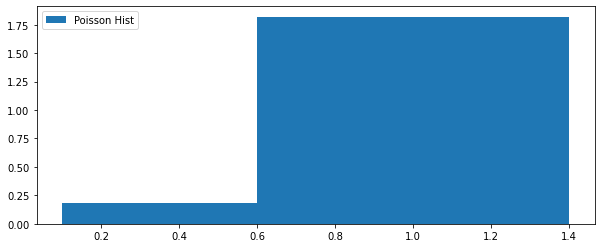

In [39]:
plot_histogram_discrete(dis,'Poisson Hist')

### Ejemplo binomial: 
La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.

Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> ## <font color ='red'>Tarea: Demostrar la validez de la siguiente ecuación
>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$

$P(X = i+1) = \frac{n!}{(i+1)!(n-i-1)!} p^{i+1}(1-p)^{n-i-1}$


$\frac{P(X = i+1)}{P(X =i)} = \frac{\frac{n!}{(i+1)!(n-i-1)!} p^{i+1}(1-p)^{n-i-1}}{\frac{n!}{(i)!(n-i)!} p^{i}(1-p)^{n-i}}$

$\frac{P(X = i+1)}{P(X =i)} = \frac{i!(n-i)i!n!p^{i+1}(1-p)^{n-i-1}}{n!(i+1)i!(n-i)i!p^{i}(1-p)^{n-1}}$

$P_i+1 = \frac{(n-i)p}{(i+1)(1-p)}p_i$

La recursividad nos ayuda a ser más eficientes computacionalmente ya que evitamos el desvordamiento 
de números que podriamos tener utilizando factoriales de números muy grandes, de forma 
que la recursividad nos ayuda a guardar memoria y mejorar los procesos en nuestro código.

### SOLUCION DAYANA

El máximo de f es: [1.875]


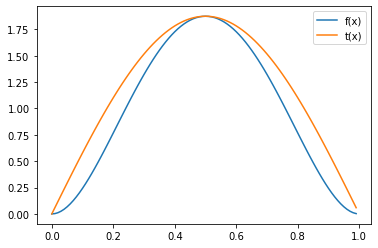

In [1]:
################    EJERCICIO 1




from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# %matplotlib notebook
%matplotlib inline

f = lambda x: 30 * (x**2 - 2*x**3 + x**4)

max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))

t =  lambda x: max_f*np.sin(np.pi*x) * np.ones([len(x)])

# Rango donde se graficará las funciones
x = np.arange(0,1,0.01)
print('El máximo de f es:',max_f)

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()


##### EJERCICIO 2

Primeramente tenemos la función $f(x)$, la cual es una función acotada con un rango finito (a,b). Y también tenemos una función $t(x)$, asumimos que podemos encontrar una función $t(x)$ tal que:

$$t(x)\geq f(x), \quad \forall x$$

Sabemos que la función $f(x)$ es una densidad:

$$\int_{-\infty}^{\infty}t(x)dx\geq \int_{-\infty}^{\infty}f(x)dx =1$$

Pero notamos que la función $t(x)\geq 0$  no es una densidad de probabilidad porque su integral no es menor a 1

Entonces hacemos lo siguiente:

$$c=\int_{-\infty}^{\infty}t(x)\geq 1$$

Con esto podemos decir que:

$$ g(x)=t(x)/c $$

Donde ya $g(x)$ **es una densidad**. Entonces:

$$\int_{-\infty}^{\infty}g(x)dx  = \int_{-\infty}^{\infty} t(x)/cdx $$

Como resultado tenemos entonces que la función $g(x)=t(x)/c \rightarrow g(x)$ **es una densidad**:

$$\frac{f(x)}{g(x)}\leq c,\quad $$

Lo que nos indica también lo siguiente:

$$\frac{f(x)}{g(x)}\leq 1,\quad $$


Siguiedo lo anterior, tenemos entonces la siguinte función:

$ t(x) = a\sin(\pi x)$

Hice el procedimiento utilizando Symbolab, obtuviendo lo siguiente:

$ g(x) = \frac{\pi\sin(\pi x)}{2} $

##### EJERCICIO 3 y 4
Para este ejercicio también utilice Symbolab obteniendo:

$ x = \frac{\cos^{-1}(-2u+1)}{\pi} $

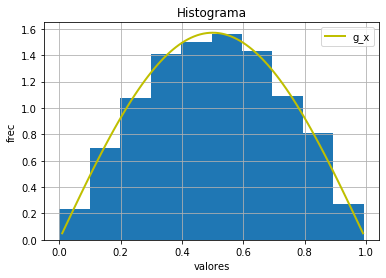

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def G_X(N):
    return np.arccos(-2*np.random.rand(N)+1)/np.pi

N=10000
X2 =G_X(N)
x = np.arange(0.01,1,0.01)
y=(np.pi*np.sin(np.pi*x))/2

plt.title('Histograma')
plt.xlabel('valores')
plt.ylabel('frec')
plt.hist(X2,density=True)
plt.plot(x,y,linewidth=2,color='y',label ='g_x' )
plt.legend()
plt.grid()



El máximo de f es: [1.875]


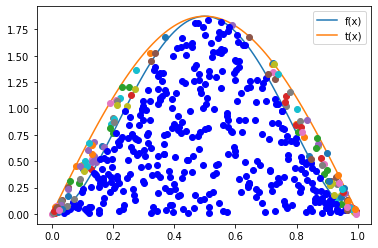

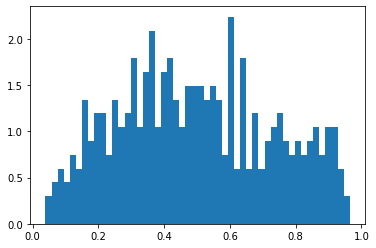

In [2]:
#############    EJERCICIO 5




# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()
    
    x =[R1[i] for i in range(len(R1)) if condition[i]]
    
    return x

N=500

f = lambda x: 30 * (x**2 - 2*x**3 + x**4)

max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))

t =  lambda x: max_f*np.sin(np.pi*x) * np.ones([len(x)])


x = np.arange(0,1,0.01)
print('El máximo de f es:',max_f)

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
N = 500
R2 = np.random.rand(N)
R1 = np.random.uniform(0,1, size = N)
x_r=Acep_rechazo(R2, R1, f, t)

y,x,n, = plt.hist(x_r, bins=50, density = True)

##### EJERCICIO 6

Una función contante siempre acepta menos puntos y mientras la función se acerque más a la original aceptara más.

In [3]:
#############    EJERCICIO 7


# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
#     [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
#          for i in range(len(R1))] 
#     plt.show()
    
    x = [R1[i] for i in range(len(R1)) if condition[i]]
    
    return x



El máximo de f es: [2.109375]


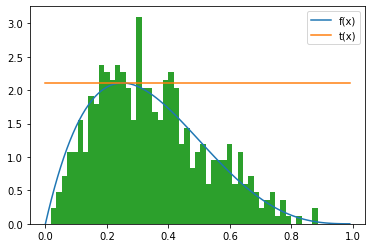

In [6]:
N=100

f = lambda x: 20*x*(1-x)**3

max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))

t =  lambda x: max_f*np.ones([len(x)])

# Rango donde se graficará las funciones
x = np.arange(0,1,0.01)
print('El máximo de f es:',max_f)

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()


N = 1000 
R2 = np.random.rand(N)
R1 = np.random.uniform(0,1, size = N)
x_r=Acep_rechazo(R2, R1, f, t)
y,x,n, = plt.hist(x_r, bins=50, density = True)